# predicting house price

## Exercise1 in ML course

### imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4

## from txt files to data frames

1. data1 is the data that we will use for the 1st exercise , regression with 1 feature (sq feet)
2. data2 is the data that we will use for the 2nd exercise , regression with 2 features (sq feet & #rooms)


In [2]:
data1 = np.loadtxt('ex1data1.txt',delimiter=',')
data2 = np.loadtxt('ex1data2.txt',delimiter=',')

dframe1=pd.DataFrame(data1)
dframe1.columns = ['sqFeet','Price']

## Plotting the data
### using pyplot

In [9]:
X= dframe1.sqFeet.as_matrix()
y= dframe1.Price.as_matrix()
dframe1.head()

,sqFeet,Price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


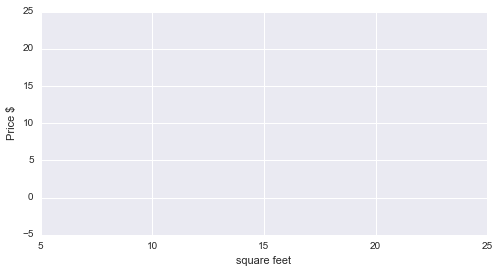

In [11]:
plt.(X,y,'r+')
plt.ylabel('Price $')
plt.xlabel('square feet')

### Using seaborn

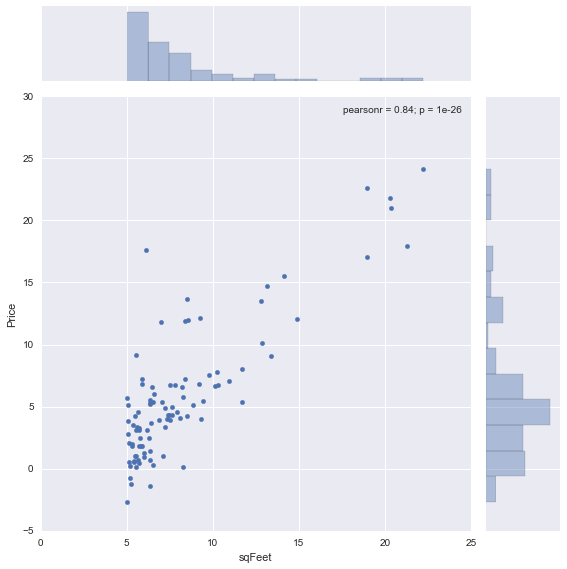

In [12]:
sns.jointplot(data = dframe1, x='sqFeet', y='Price', size= 8 )

## Gradient Descent

In [13]:
# Add a column of ones to x
m = len(y)
X = np.array(dframe1.sqFeet)
y = np.array(dframe1.Price)
X = np.c_[np.ones(m), X]
# initialize fitting parameters
theta1 = np.zeros((X.shape[1], 1))

### Cost function

In [14]:
def computeCost(X,y,theta):
    #J = sum((X*theta-y).^2)/(2*m);
    m = len(y)
    sol = np.dot((X),theta)
    
    return np.sum((sol-y.reshape(m,1))**2)/(2*m)

In [15]:
def h(X,theta):
    return np.dot(X,theta)

In [16]:
def featureNormalize(X):
    
    mu = np.mean(X, axis=0)
    segma = np.std(X, axis=0)
    
    X1 = np.c_[(X[:,0]-mu[0])/segma[0],(X[:,1]-mu[1])/segma[1]]
    return X1,mu,segma

In [17]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,1))
    for it in range(num_iters):
        theta = theta - (alpha/m)* np.dot(X.T, h(X,theta) - y.reshape(m,1));
        J_history[it] = computeCost(X, y, theta)/100000;
    
    return (theta , J_history)

### using the above functions to predict house prices

In [18]:
# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

theta, J_history = gradientDescentMulti(X,y,theta1,alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

## plot the linear fit
### Using pyplot

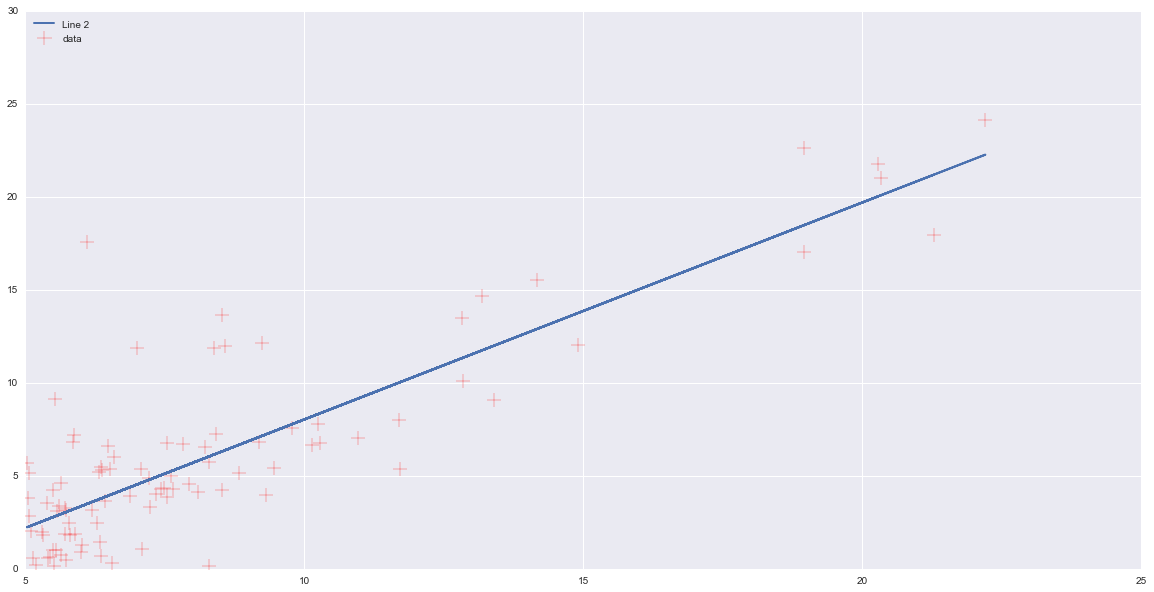

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(X[:,1],y,c='r',marker = '+' ,label="data",s=200) #Data
plt.plot(X[:,1],X.dot(theta), label="Line 2", linewidth=2) #Linear fit

plt.legend(loc = "upper left")
plt.ylim(ymin=0)
plt.xlim(xmin=5)


plt.show()

### Using seaborn

Using the linear model from least squares 

(5, 25.0)

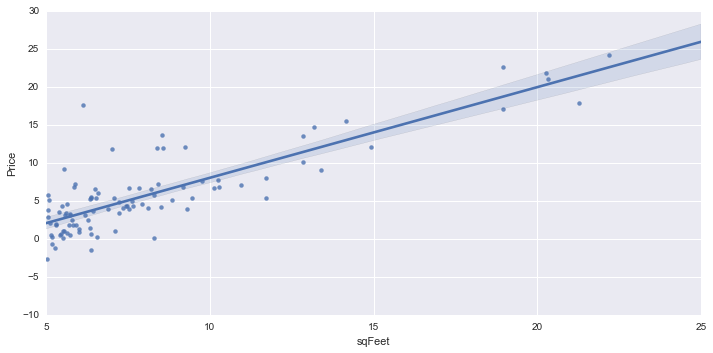

In [27]:
sns.lmplot(x='sqFeet',y='Price',data=dframe1,size=5,aspect=2)
sns.plt.xlim(xmin=5)

## Exercise2 
### Multi Linear regression

In [32]:
dframe2 = pd.DataFrame(data2,columns=['sqFeet','nRooms','Price'])
dframe2.nRooms = dframe2.nRooms.astype('category')
dframe2.head()

,sqFeet,nRooms,Price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0


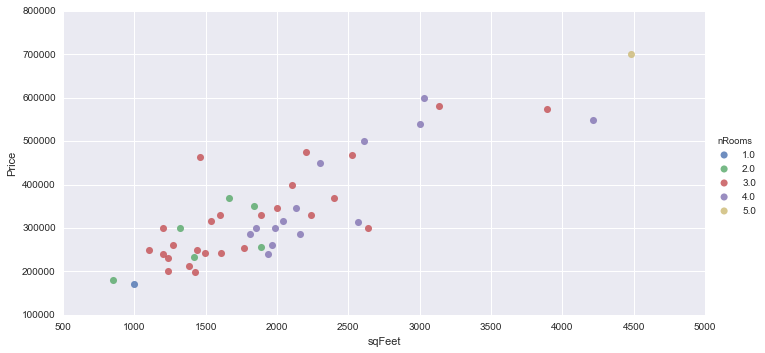

In [33]:
sns.lmplot(data= dframe2, x='sqFeet',y='Price',hue = 'nRooms',fit_reg=False , scatter_kws={"s":50},aspect=2)

In [34]:
dframe2.nRooms = dframe2.nRooms.astype('float')
dframe2.sqFeet = dframe2.sqFeet.astype('float')
X2 = dframe2.as_matrix()[:,:-1]
y2 = dframe2.as_matrix()[:,-1]

In [35]:
iterations = 700;
alpha = 0.008;

m2 = len(y2)
X2,mu,segma = featureNormalize(X2)
# adding acoloumn of ones
X2 = np.c_[np.ones(m2), X2]
# initialize fitting parameters
theta2 = np.zeros((X2.shape[1], 1))

gtheta, J_history = gradientDescentMulti(X2,y2,theta2,alpha, iterations)

### Making sure the gradient descent is working

plotting the cost function after every iteration 

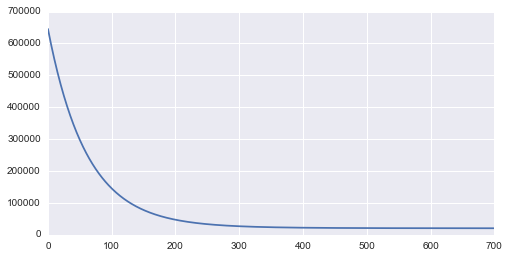

In [37]:
plt.plot(np.array(range(len(J_history))),J_history)
plt.show()

### making prediction

In [322]:
x = [1,(1650-mu[0])/segma[0],(3-mu[1])/segma[1]]
#x=(x-mu)/segma
#x2 = [1, x[0], x[1]]
np.dot(x,gtheta)

array([ 292936.84524929])

In [332]:
dframe2[(dframe2['sqFeet']>=1600) & (dframe2['sqFeet']<=1800)]

,sqFeet,nRooms,Price
1,1600.0,3.0,329900.0
20,1767.0,3.0,252900.0
22,1604.0,3.0,242900.0
40,1664.0,2.0,368500.0


## Conclusion:
We can easily see that the error is still high , this is not suprising because we are taking a subset of 2 features from a large set of features. 